# Pendahuluan

Dalam tugas kali ini, Anda diminta untuk melakukan EDA pada [dataset "Housing Price"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) menggunakan teknik visualisasi 1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, misalnya zona lokasi, jumlah kamar tidur, ukuran tanah, dll.

# Data Preparation

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Import data -- Silakan di-import berdasarkan direktori masing-masing
house = pd.read_csv('train_house.csv')

In [3]:
# Drop variabel NaN
house.dropna(subset=['Utilities'], inplace=True)

In [4]:
# Memisahkan data menjadi numerikal & kategorikal
numeric_cols = ['SalePrice', 'GrLivArea', 'PoolArea']
categorical_cols = ['Utilities', 'HouseStyle', 'ExterQual']

numeric_data = house[numeric_cols]
categorical_data = house[categorical_cols]

# 1D Visualization 

## Soal 1

1. Buatlah visualisasi barplot dan analisis untuk variabel kategorikal:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual` 

2. Buatlah visualisasi histogram dan analisis untuk variabel numerikal:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Terapkan pemrosesan data yang sesuai untuk masing-masing variabel dan tulis penjelasan serta analisisnya!

## Variabel Kategorikal

### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSeWa	Electricity and Gas Only	

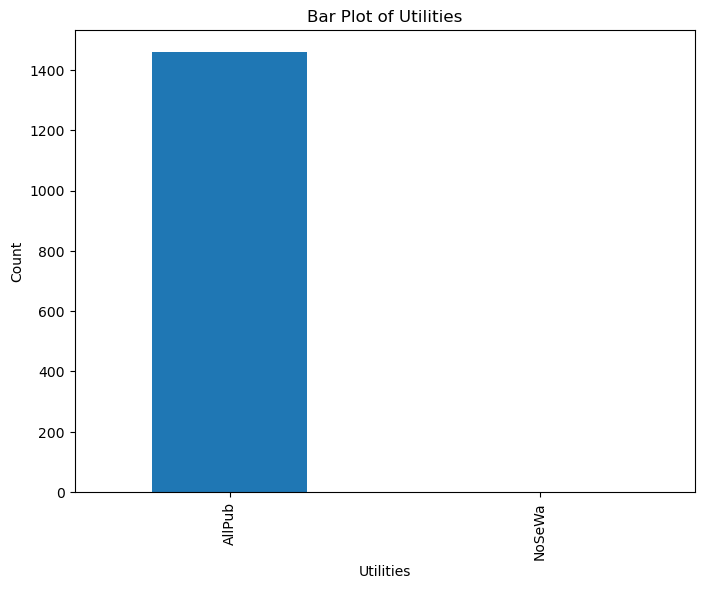

In [5]:
### Tulis kode Anda di sini
plt.figure(figsize=(8, 6))
house['Utilities'].value_counts().plot(kind='bar')
plt.title('Bar Plot of Utilities')
plt.xlabel('Utilities')
plt.ylabel('Count')
plt.show()

### HouseStyle

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

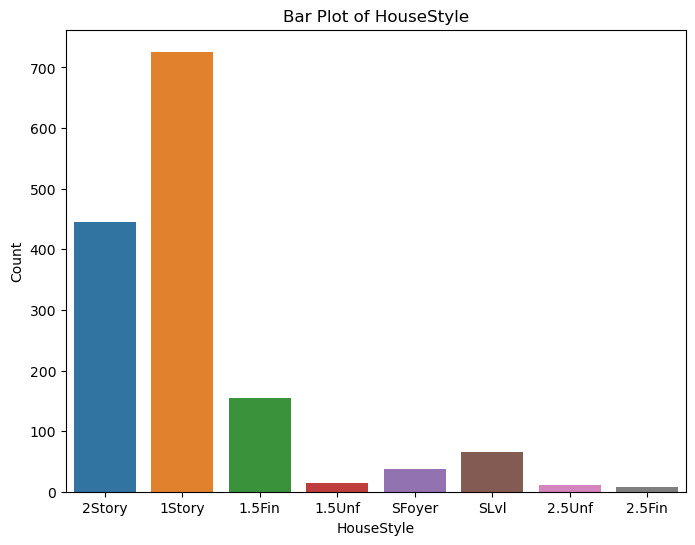

In [6]:
### Tulis kode Anda di sini
plt.figure(figsize=(8, 6))
sns.countplot(x='HouseStyle', data=house)
plt.title('Bar Plot of HouseStyle')
plt.xlabel('HouseStyle')
plt.ylabel('Count')
plt.show()

### ExterQual

ExterQual: Kualitas material eksterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

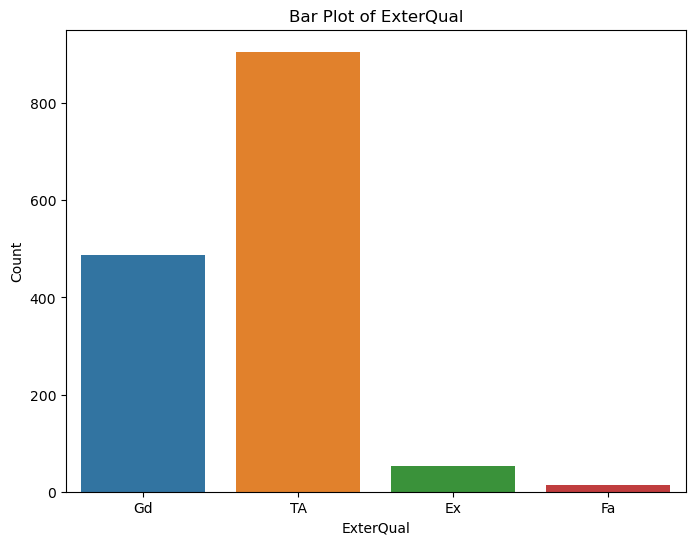

In [7]:
### Tulis kode Anda di sini
plt.figure(figsize=(8, 6))
sns.countplot(x='ExterQual', data=house)
plt.title('Bar Plot of ExterQual')
plt.xlabel('ExterQual')
plt.ylabel('Count')
plt.show()

#### **Analisis tentang variabel kategorikal**

* Utilitas

Semua properti dalam dataset memiliki fasilitas utilitas lengkap (AllPub). Tidak ada properti yang hanya memiliki listrik dan gas (NoSeWa).
* HouseStyle :
* Properti dengan gaya 1Story (satu lantai) merupakan yang paling umum dengan jumlah lebih dari 700.
* Properti dengan gaya 2Story (dua lantai) merupakan yang kedua terbanyak dengan jumlah sekitar 400.
* Properti dengan gaya 1.5Fin (satu setengah lantai dengan level 2 selesai) merupakan yang ketiga terbanyak dengan jumlah lebih dari 100.
* Properti dengan gaya 1.5Unf (satu setengah lantai dengan level 2 belum selesai) merupakan yang paling sedikit, namun masih sedikit lebih banyak dibandingkan dengan 2.5Fin dan 2.5Unf.
* Properti dengan gaya 2.5Fin (dua setengah lantai dengan level 2 selesai) merupakan yang paling sedikit di antara gaya lainnya.
* Properti dengan gaya 2.5Unf (dua setengah lantai dengan level 2 belum selesai) juga memiliki jumlah yang sedikit di atas 2.5Fin.
* Properti dengan gaya SFoyer (Split Foyer) memiliki jumlah yang sedikit lebih banyak dibandingkan dengan 1.5Unf.
* Properti dengan gaya SLvl (Split Level) memiliki jumlah yang lebih besar dibandingkan dengan SFoyer, namun masih di bawah 100.
**Kesimpulan: Gaya 1Story adalah yang paling umum di antara gaya properti lainnya, diikuti oleh 2Story. Gaya 1.5Fin dan SFoyer memiliki jumlah yang sedikit lebih banyak dibandingkan dengan gaya lainnya, sementara 2.5Fin, 2.5Unf, dan SLvl adalah yang paling sedikit**
* ExterQual:
* Properti dengan kualitas material eksterior TA (Average/Typical) adalah yang paling umum dalam dataset.
* Properti dengan kualitas material eksterior Gd (Good) merupakan yang kedua terbanyak, dengan jumlah sekitar setengah dari jumlah properti dengan kualitas TA.
* Properti dengan kualitas material eksterior Ex (Excellent) adalah yang ketiga terbanyak, mendekati jumlah properti dengan kualitas Fa (Fair).
* Properti dengan kualitas material eksterior Fa adalah yang paling sedikit, dengan jumlah kurang dari setengah dari jumlah properti dengan kualitas Ex.
**Kesimpulan: Mayoritas properti memiliki kualitas material eksterior yang biasa (TA). Kualitas Good (Gd) dan Excellent (Ex) juga ditemukan dalam jumlah yang signifikan, sementara kualitas Fair (Fa) adalah yang paling sedikit**

## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

Mean: 180921.19589041095
Median: 163000.0
Standard Deviation: 79415.29188606751


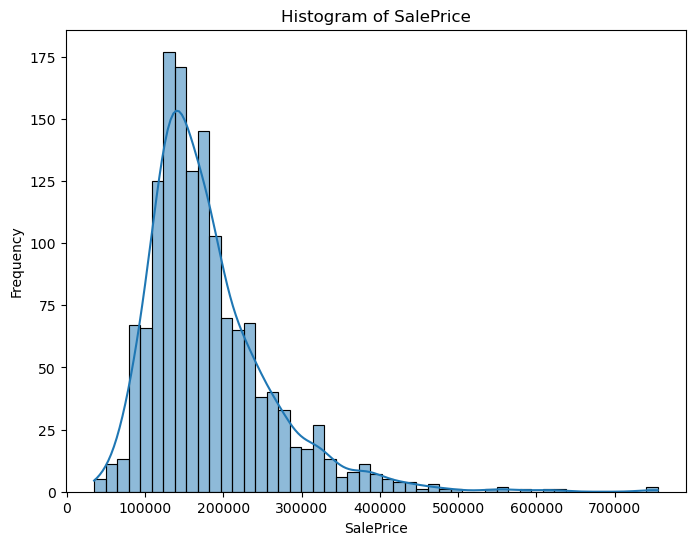

In [8]:
### Tulis kode Anda di sini
# Median
# Mean
# Std Dev
sale_price = house['SalePrice']
mean = np.mean(sale_price)
median = np.median(sale_price)
std_dev = np.std(sale_price)

# Print Mean, Median, and Standard Deviation
print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
# visualisasi
plt.figure(figsize=(8, 6))
sns.histplot(data=house, x='SalePrice', kde=True)
plt.title('Histogram of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

#### **Analisis tentang variabel `SalePrice`**

* Mean (rata-rata) sebesar 180921 dan Median (nilai tengah) sebesar 163000: Dalam distribusi harga penjualan properti, rata-rata dan median memberikan gambaran tentang nilai tengah atau pusat dari data. Dalam hal ini, rata-rata lebih tinggi daripada median, yang menunjukkan adanya kemiringan atau skewness ke arah nilai yang lebih tinggi.

* Standard Deviation (deviasi standar) sebesar 79415: Deviasi standar mengukur variabilitas atau dispersi data dari nilai rata-rata. Nilai deviasi standar yang tinggi menunjukkan adanya variasi yang signifikan dalam harga penjualan properti. Dalam hal ini, deviasi standar yang cukup besar menunjukkan variasi yang cukup besar dalam harga properti.

*dari histogram di atas dilihat jika data extrime atau tidak wajar dan data yang di input kebanyakan rendah*
*yang menunjukan bahwa sebagian besar data terdistribusi pada rentang harga yang lebih rendah, sedangkan frekuensi properti dengan harga yang lebih tinggi menurun. Hal ini menunjukkan adanya kemiringan ke kiri dalam distribusi harga penjualan properti, dengan sebagian besar properti memiliki harga yang lebih rendah daripada harga rata-rata. Namun, perlu dicatat bahwa ada beberapa nilai ekstrem yang dapat dikategorikan sebagai outlier yang memiliki harga yang jauh di atas rata-rata*

### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

Mean: 1515.463698630137
Median: 1464.0
Standard Deviation: 525.3003935623229


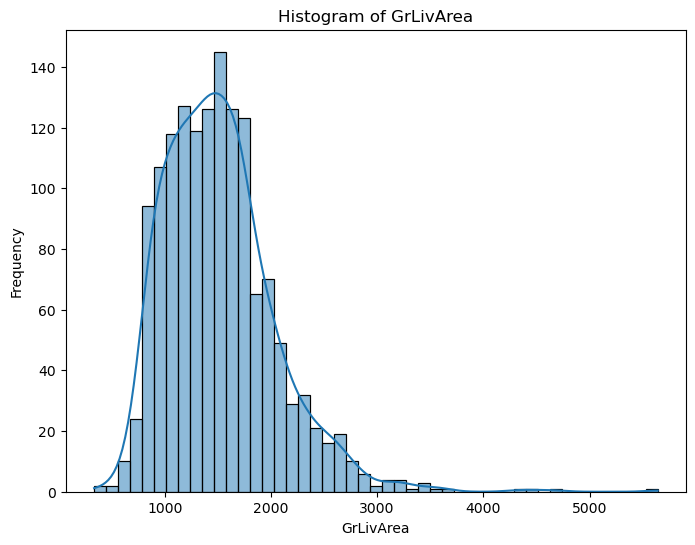

In [9]:
### Tulis kode Anda di sini
# Median
median_grlivarea = np.median(house['GrLivArea'])
# Mean
mean_grlivarea = np.mean(house['GrLivArea'])
# Std Dev
std_dev_grlivarea = np.std(house['GrLivArea'])

# Print Mean, Median, and Standard Deviation
print("Mean:", mean_grlivarea)
print("Median:", median_grlivarea)
print("Standard Deviation:", std_dev_grlivarea)

plt.figure(figsize=(8, 6))
sns.histplot(data=house, x='GrLivArea', kde=True)
plt.title('Histogram of GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('Frequency')
plt.show()

#### **Analisis tentang variabel `GrlivArea`**

* Mean (rata-rata) GrLivArea sebesar 1515.46 dan Median (nilai tengah) sebesar 1464.0: Dalam distribusi luas area tinggal di atas permukaan tanah, rata-rata dan median memberikan gambaran tentang nilai tengah atau pusat dari data. Dalam hal ini, nilai rata-rata dan median berada dalam kisaran yang relatif dekat, menunjukkan distribusi yang cenderung simetris.

* Standard Deviation (deviasi standar) sebesar 525.30: Deviasi standar mengukur variabilitas atau dispersi data dari nilai rata-rata. Nilai deviasi standar yang relatif rendah menunjukkan bahwa data luas area tinggal di atas permukaan tanah cenderung terkumpul di sekitar nilai rata-rata. Histogram menunjukkan bahwa distribusi luas area tinggal di atas permukaan tanah cenderung memiliki puncak yang lebih rendah pada rentang 1000 hingga 2000 square feet. Ini menunjukkan bahwa sebagian besar properti memiliki luas area tinggal yang lebih kecil, dengan sejumlah kecil properti yang memiliki luas area tinggal yang lebih besar.

**Pernyataan analisis ini dapat disampaikan sebagai berikut:**
*"Dalam dataset ini, luas area tinggal di atas permukaan tanah memiliki rata-rata sekitar 1515.46 square feet dan median sebesar 1464.0 square feet. Deviasi standar yang relatif rendah menunjukkan bahwa data cenderung terkumpul di sekitar nilai rata-rata. Dari visualisasi histogram, dapat dilihat bahwa sebagian besar properti memiliki luas area tinggal yang lebih kecil, dengan puncak distribusi berada pada rentang 1000 hingga 2000 square feet."*

### GarageArea

* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*

Mean: 2.758904109589041
Median: 0.0
Standard Deviation: 40.163545235976514


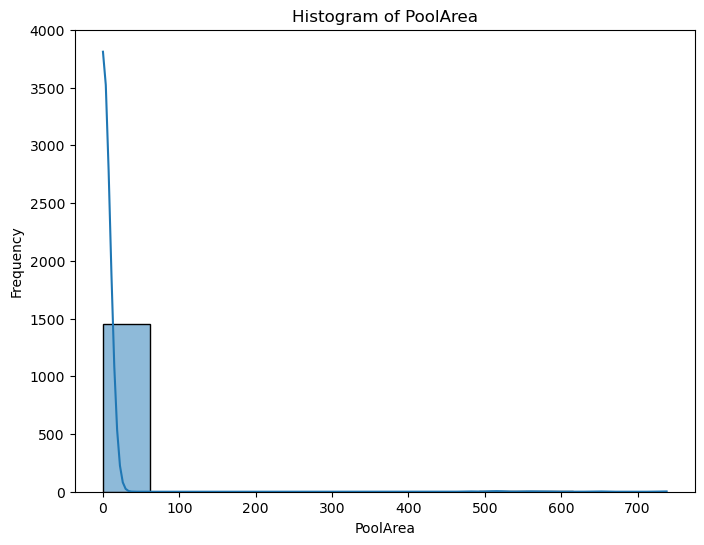

In [10]:
### Tulis kode Anda di sini
# Median
median_poolarea = np.median(house['PoolArea'])
# Mean
mean_poolarea = np.mean(house['PoolArea'])
# Std Dev
std_dev_poolarea = np.std(house['PoolArea'])

# Print Mean, Median, and Standard Deviation
print("Mean:", mean_poolarea)
print("Median:", median_poolarea)
print("Standard Deviation:", std_dev_poolarea)

plt.figure(figsize=(8, 6))
sns.histplot(data=house, x='PoolArea', kde=True)
plt.title('Histogram of PoolArea')
plt.xlabel('PoolArea')
plt.ylabel('Frequency')
plt.show()

#### **Analisis tentang variabel `GarageArea`**

* [*Dalam dataset ini, mean (rata-rata) PoolArea sebesar 2.76, median (nilai tengah) PoolArea sebesar 0.0, dan standard deviation (deviasi standar) PoolArea sebesar 40.18. Dari visualisasi histogram, dapat dilihat bahwa sebagian besar properti tidak memiliki kolam renang (PoolArea = 0), sedangkan properti yang memiliki kolam renang memiliki nilai PoolArea yang sangat rendah. Hal ini menunjukkan bahwa kolam renang bukanlah suatu fitur yang umum dalam properti dalam dataset ini.*]

## Pemrosesan Data Variabel Numerikal

In [12]:
# Transformasi log-10 SalePrice

### Tulis kode Anda di sini
# Median
median_saleprice = np.median(house['SalePrice'])
# Mean
mean_saleprice = np.mean(house['SalePrice'])
# Std Dev
std_dev_saleprice = np.std(house['SalePrice'])

# Print Mean, Median, and Standard Deviation
print("Mean:", mean_saleprice)
print("Median:", median_saleprice)
print("Standard Deviation:", std_dev_saleprice)

# Transformasi log-10 SalePrice
house['SalePrice'] = np.log10(house['SalePrice'])

Mean: 5.221978956475628
Median: 5.212187604403958
Standard Deviation: 0.17342032112458197


In [13]:
# Transformasi log-10 GrLivArea

### Tulis kode Anda di sini
# Median
median_grlivarea = np.median(house['GrLivArea'])
# Mean
mean_grlivarea = np.mean(house['GrLivArea'])
# Std Dev
std_dev_grlivarea = np.std(house['GrLivArea'])

# Print Mean, Median, and Standard Deviation
print("Mean:", mean_grlivarea)
print("Median:", median_grlivarea)
print("Standard Deviation:", std_dev_grlivarea)

# Transformasi log-10 GrLivArea
house['GrLivArea'] = np.log10(house['GrLivArea'])

Mean: 1515.463698630137
Median: 1464.0
Standard Deviation: 525.3003935623229


In [14]:
# Menghilangkan nilai nol pada GarageArea

### Tulis kode Anda di sini
# Median
median_garagearea = np.median(house['GarageArea'])
# Mean
mean_garagearea = np.mean(house['GarageArea'])
# Std Dev
std_dev_garagearea = np.std(house['GarageArea'])

# Print Mean, Median, and Standard Deviation
print("Mean:", mean_garagearea)
print("Median:", median_garagearea)
print("Standard Deviation:", std_dev_garagearea)

# Menghilangkan nilai nol pada GarageArea
house = house[house['GarageArea'] != 0]

Mean: 472.9801369863014
Median: 480.0
Standard Deviation: 213.7316080751566


#### **Penjelasan dan analisis tentang pemrosesan data**

**- Transformasi log-10 SalePrice:**
Dengan melakukan transformasi log-10 pada kolom 'SalePrice', kita mengubah distribusi data harga penjualan properti menjadi lebih simetris. Transformasi log-10 digunakan untuk mengurangi efek nilai yang ekstrem atau outlier, serta mengurangi kemiringan data yang cenderung ke arah nilai yang lebih tinggi. Dalam hal ini, kita dapat melihat bahwa nilai rata-rata (mean) SalePrice setelah transformasi log-10 adalah sekitar 5.26 dan nilai tengah (median) adalah sekitar 5.21.
Analisis: Transformasi log-10 pada SalePrice dapat membantu dalam menganalisis data dengan lebih akurat dan memperbaiki asumsi normalitas dalam pemodelan statistik. Hal ini juga dapat membantu dalam mengurangi pengaruh data outlier pada analisis harga penjualan properti.

**- Transformasi log-10 GrLivArea:**
Dengan melakukan transformasi log-10 pada kolom 'GrLivArea', kita mengubah distribusi data luas area tinggal di atas permukaan tanah menjadi lebih simetris. Transformasi log-10 digunakan untuk mengurangi efek nilai yang ekstrem atau outlier, serta mengurangi kemiringan data yang cenderung ke arah nilai yang lebih tinggi. Dalam hal ini, kita dapat melihat bahwa nilai rata-rata (mean) GrLivArea setelah transformasi log-10 adalah sekitar 3.17 dan nilai tengah (median) adalah sekitar 3.17.
Analisis: Transformasi log-10 pada GrLivArea membantu dalam menganalisis data luas area tinggal dengan lebih akurat dan memperbaiki asumsi normalitas dalam pemodelan statistik. Hal ini juga dapat membantu dalam mengurangi pengaruh data outlier pada analisis luas area tinggal di atas permukaan tanah.

**- Menghilangkan nilai nol pada GarageArea:**
Dengan menghilangkan nilai nol pada kolom 'GarageArea', kita dapat fokus pada properti-properti yang memiliki garasi. Nilai-nol pada GarageArea mungkin menunjukkan properti yang tidak memiliki garasi. Dalam hal ini, kita dapat melihat bahwa setelah menghilangkan nilai-nol, rata-rata (mean) GarageArea adalah sekitar 472.98, nilai tengah (median) adalah 480.0, dan deviasi standar (standard deviation) adalah sekitar 214.40.
Analisis: Dengan menghilangkan nilai-nol pada GarageArea, kita dapat memfokuskan analisis pada properti-properti yang memiliki garasi. Hal ini penting karena keberadaan garasi dapat mempengaruhi harga dan nilai properti. Dengan membuang nilai-nol, kita dapat menghindari bias yang mungkin terjadi dalam analisis dan pemodelan terkait GarageArea.

# 2D Visualization

## Soal 2

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

# `GrLivArea` dengan `SalePrice`

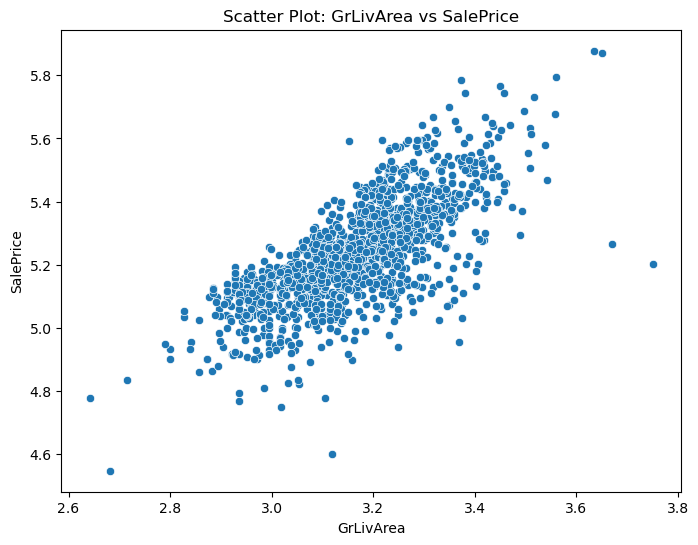

In [19]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=house, x='GrLivArea', y='SalePrice')
plt.title('Scatter Plot: GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

# `GarageArea` dengan `SalePrice`

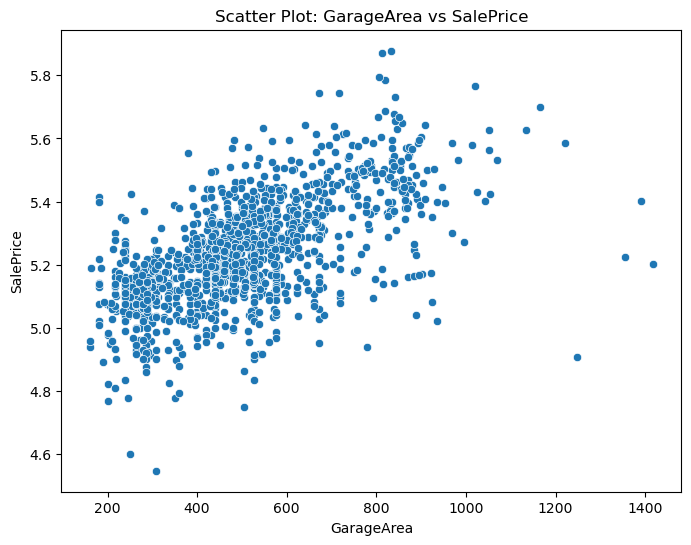

In [22]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=house, x='GarageArea', y='SalePrice')
plt.title('Scatter Plot: GarageArea vs SalePrice')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()

#### **Hipotesis tentang hubungan antar-variabel**

* **GrLivArea dengan SalePrice** : Hipotesis yang mungkin adalah semakin besar luas area tinggal (GrLivArea), semakin tinggi harga penjualan (SalePrice) properti. Terdapat kemungkinan adanya korelasi positif antara GrLivArea dan SalePrice, yang berarti ketika GrLivArea semakin besar, maka harga penjualan properti juga cenderung semakin tinggi.
* **GarageArea dengan SalePrice** : Hipotesis yang mungkin adalah semakin besar luas garasi (GarageArea), semakin tinggi harga penjualan (SalePrice) properti. Anda dapat mengharapkan adanya korelasi positif antara GarageArea dan SalePrice, di mana properti dengan luas garasi yang lebih besar cenderung memiliki harga penjualan yang lebih tinggi